In [36]:
import numpy 
import matplotlib.pyplot as plt 

### Gambling Problem

A gambler has the opportunity to make bets on
the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many
dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends
when the gambler wins by reaching his goal of $100, or loses by running out of money.
On each flip, the gambler must decide what portion of his capital to stake, in integer
numbers of dollars.

In [37]:
class Gambler: 
    def __init__(self, name, tgt_amount = 100):
        self.name   = name 
        self.tgt    = tgt_amount 
        self.V      = numpy.zeros(tgt_amount + 1) 
        self.policy = numpy.zeros(tgt_amount) 
    
    # Now we will implement the value iteration method to find the best gamble 
    def train(self, discount_factor = 1, p_h = 0.25):
        # Rewards for training 
        reward = numpy.zeros(self.tgt + 1)
        reward[self.tgt] = 1 

        # Now implement value iteration 
        print("Training " + self.name + "...") 
        while True: 
            tolerance = 0

            for c in range(1,self.tgt):
                A = numpy.zeros(self.tgt + 1) 
                # Calculated expected rewards 
                stakes = list(range(1, min(c, 100 - c) + 1))

                for amt in stakes: 
                    A[amt] = p_h * (reward[amt + c] + self.V[c + amt]* discount_factor) + (1 - p_h) * (reward[c - amt] + self.V[c - amt]*discount_factor) 

                optimal_stake = numpy.max(A) 

                tolerance = max(tolerance, numpy.abs(optimal_stake - self.V[c])) 

                self.V[c] = optimal_stake
            
            
            if tolerance < 0.00001:
                break 
        
        # Now do policy improvement step
        for c in range(1,100):
            A = numpy.zeros(self.tgt + 1) 
                # Calculated expected rewards 
            stakes = list(range(1, min(c, 100 - c) + 1))

            for amt in stakes: 
                A[amt] = p_h * (reward[amt + c] + self.V[c + amt]* discount_factor) + (1 - p_h) * (reward[c - amt] + self.V[c - amt]*discount_factor) 

            optimal_stake = numpy.argmax(A)
            self.policy[c] = optimal_stake
        
        print("Training Ends...")
        print()
        print() 
        return 

    def getPolicy(self):
        return self.policy 
    
    def getValues(self):
        return self.V 

In [38]:
# Run the code 
gambler = Gambler("Rohit")

In [39]:
gambler.train()

Training Rohit...
Training Ends...




In [40]:
gambler.getPolicy()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 11., 10.,  9., 17.,  7., 19.,  5., 21., 22., 23., 24., 25.,
        1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 38.,
       11., 40.,  9.,  8., 43., 44., 45.,  4., 47.,  2.,  1., 50.,  1.,
        2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 11.,
       15.,  9.,  8., 18., 19., 20.,  4., 22.,  2.,  1., 25.,  1.,  2.,
        3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12., 11., 10.,
        9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

In [41]:
gambler.getValues()

array([0.00000000e+00, 7.24792480e-05, 2.90025957e-04, 6.95257448e-04,
       1.16553530e-03, 1.77117810e-03, 2.78102979e-03, 4.03661077e-03,
       4.66282014e-03, 5.60118258e-03, 7.08471239e-03, 9.04084742e-03,
       1.11241192e-02, 1.56793594e-02, 1.61464431e-02, 1.69533836e-02,
       1.86524581e-02, 1.98258869e-02, 2.24056356e-02, 2.73845196e-02,
       2.83400377e-02, 3.04944152e-02, 3.61633897e-02, 3.84958114e-02,
       4.44968586e-02, 6.25000000e-02, 6.27175195e-02, 6.33741515e-02,
       6.45857723e-02, 6.59971151e-02, 6.78135343e-02, 7.08430894e-02,
       7.46098323e-02, 7.64893436e-02, 7.93042267e-02, 8.37550283e-02,
       8.96225423e-02, 9.58726439e-02, 1.09538140e-01, 1.10939329e-01,
       1.13360151e-01, 1.18457374e-01, 1.21978170e-01, 1.29716907e-01,
       1.44653605e-01, 1.47520113e-01, 1.53983628e-01, 1.70990204e-01,
       1.77987721e-01, 1.95990790e-01, 2.50000000e-01, 2.50217519e-01,
       2.50874151e-01, 2.52085772e-01, 2.53497115e-01, 2.55313534e-01,
      

Text(0, 0.5, 'The Expected Value Estimate')

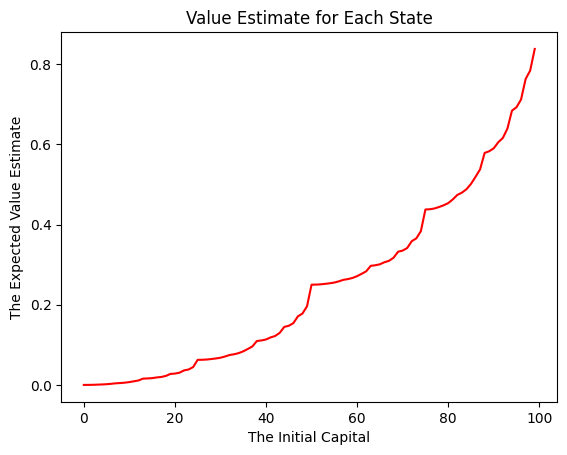

In [43]:
# Plot 
axis = list(range(100)) 
y    = gambler.getValues()[:100]

plt.plot(axis,y, color = 'red')
plt.title('Value Estimate for Each State') 
plt.xlabel('The Initial Capital')
plt.ylabel('The Expected Value Estimate') 



Text(0, 0.5, 'The Best Gamble Estimate')

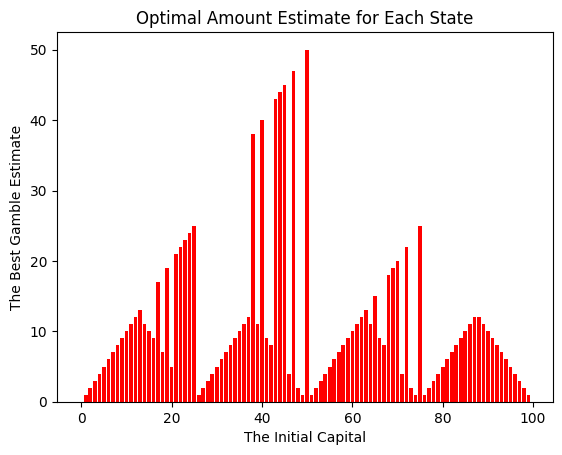

In [45]:
# Plot 
axis = list(range(100)) 
y    = gambler.getPolicy()[:100]

plt.bar(axis,y, color = 'red', align='center')
plt.title('Optimal Amount Estimate for Each State') 
plt.xlabel('The Initial Capital')
plt.ylabel('The Best Gamble Estimate') 

